<p align="center">
<img src="Images/sorbonne_logo.png" alt="Logo" width="300"/>
</p>

# **Module 3 - Modelling**

* **Author**: Elia Landini
* **Student ID**: 12310239
* **Course**: EESM2-Financial Economics 
* **Supervisor**: XXXXXXXXXXXXXXXX
* **Reference Repository**: https://github.com/EliaLand/PVAR_japan_endogenous_money

### **1) REQUIREMENTS SET-UP**

In [3]:
# Requirements.txt file installation
# !pip install -r requirements.txt

In [4]:
# Libraries import
import warnings
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import levene
from scipy.stats import ks_2samp
from scipy.stats import kstest
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.filters.hp_filter import hpfilter
import sklearn.tree
import sklearn.metrics
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             precision_score, recall_score, f1_score,
                             accuracy_score, precision_recall_curve, auc, 
                             RocCurveDisplay, ConfusionMatrixDisplay)
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight
import plotly.express as px
import openpyxl as pxl
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from IPython.display import Image
import itertools
from arch.unitroot import PhillipsPerron

### **2) MODEL LOGIC**

In [5]:
# Raw df import
jp_aggregated_df = pd.read_csv("Data/Aggregated/jp_aggregated_df.csv")
jp_aggregated_df

,Country,Time,Monetary Aggregates - M1 (JPY),Monetary Aggregates - M2 (JPY),Monetary Aggregates - M3 (JPY),Total Credit - Private Non-Financial (%GDP),Total Credit - General Government (%GDP),Total Credit - Households & NPISHs (%GDP),Total Treasury Reserves (- Gold),10-Year Gov Bond Yields (%),...,USD-JPY reer CPI-based (Index 2015=100),JPY-USD Spot Exchange Rate,HICP (NSA),Real GDP (billions chained 2015 JPY),Central Government Debt (% GDP),Domestic Private Debt Securities (% GDP),Domestic Public Debt Securities (% GDP),BoJ’s Total Assets (100 Million Yen),10-Year US T-Bills Yield (%),CBOE-VIX
0,JP,1950-12,NaN,NaN,NaN,NaN,NaN,NaN,5.980000e+02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JP,1951-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JP,1951-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JP,1951-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JP,1951-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,JP,2025-09,NaN,NaN,NaN,NaN,NaN,NaN,1.237223e+06,1.645,...,80.87212,147.8629,NaN,590141.1,NaN,NaN,NaN,6957819.0,4.120476,15.789091
898,JP,2025-10,NaN,NaN,NaN,NaN,NaN,NaN,1.238269e+06,1.655,...,79.34765,151.3545,NaN,NaN,NaN,NaN,NaN,6963487.0,4.061818,18.086522
899,JP,2025-11,NaN,NaN,NaN,NaN,NaN,NaN,1.245364e+06,1.805,...,77.74197,155.1411,NaN,NaN,NaN,NaN,NaN,6979490.0,4.093889,19.769500
900,JP,2025-12,NaN,NaN,NaN,NaN,NaN,NaN,1.252027e+06,2.060,...,76.74510,155.9150,NaN,NaN,NaN,NaN,NaN,6777762.0,4.143182,15.548182


In [8]:
# Transformed df import
jp_trans_df = pd.read_csv("Data/Transformed/jp_trans_df.csv")
jp_trans_df

,Country,Time,LogDiff-Monetary Aggregates - M1 (JPY),LogDiff-Monetary Aggregates - M2 (JPY),LogDiff-Monetary Aggregates - M3 (JPY),LogDiff-Total Treasury Reserves (- Gold),LogDiff-USD-JPY reer CPI-based (Index 2015=100),LogDiff-JPY-USD Spot Exchange Rate,LogDiff-HICP (NSA),LogDiff-BoJ’s Total Assets (100 Million Yen),...,AR(1)detrend-10-Year Gov Bond Yields (%),AR(1)detrend-Call Money/Interbank Immediate (%),AR(1)detrend-Est. 1-year Neutral Interest Rate (%),AR(1)detrend-Est. 10-year Neutral Interest Rate (%),AR(1)detrend-Central Government Debt (% GDP),AR(1)detrend-Domestic Private Debt Securities (% GDP),AR(1)detrend-Domestic Public Debt Securities (% GDP),AR(1)detrend-10-Year US T-Bills Yield (%),AR(1)detrend-CBOE-VIX,HPfilter-Real GDP (billions chained 2015 JPY)
0,JP,1950-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JP,1951-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JP,1951-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JP,1951-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JP,1951-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,JP,2025-09,NaN,NaN,NaN,0.005091,-0.004843,0.002602,NaN,-0.039797,...,0.049781,0.005696,0.002627,0.002818,NaN,NaN,NaN,-0.151298,-0.505049,-0.003512
898,JP,2025-10,NaN,NaN,NaN,0.000845,-0.019030,0.023339,NaN,0.000814,...,0.015083,0.005696,0.014627,0.018818,NaN,NaN,NaN,-0.066308,1.759220,NaN
899,JP,2025-11,NaN,NaN,NaN,0.005714,-0.020444,0.024710,NaN,0.002295,...,0.155151,0.006696,0.002655,0.002863,NaN,NaN,NaN,0.024161,1.493216,NaN
900,JP,2025-12,NaN,NaN,NaN,0.005336,-0.012906,0.004976,NaN,-0.029329,...,0.261160,0.084704,0.002655,0.002863,NaN,NaN,NaN,0.041525,-4.155824,NaN


### **2) MODEL TRY**

In [12]:
from scipy.integrate import solve_ivp

In [13]:
def is_lm_endogenous(t, s, params):
    Y, Inv, i, P, pi_e, M, D = s
    
    # unpack parameters
    C0, c, I0, alpha, G = params["IS"]
    a, b, phi = params["LM"]
    loan_rate, repay_rate = params["credit"]
    
    # ---- expectations ----
    pi = np.gradient(np.log(P)) if P > 0 else 0
    r = i - pi_e
    
    # ---- IS block ----
    C = C0 + c * Y
    I = I0 - alpha * r
    AD = C + I + G
    
    dInv = AD - Y
    dY = (AD - Y) / params["tau_Y"]
    
    # ---- LM block ----
    money_demand = a * Y - b * i
    real_money = M / P
    di = phi * (money_demand - real_money)
    
    # ---- endogenous money ----
    new_loans = loan_rate * I
    repayments = repay_rate * D
    
    dD = new_loans - repayments
    dM = new_loans - repayments
    
    # ---- prices & expectations (optional) ----
    dP = params["price_elasticity"] * (Inv - params["Inv_star"])
    dpi_e = (pi - pi_e) / params["tau_pi"]
    
    return [
        dY,
        dInv,
        di,
        dP,
        dpi_e,
        dM,
        dD
    ]


In [15]:
params = {
    "IS": {
        "C0": 50.0,     # autonomous consumption
        "c": 0.6,       # MPC
        "I0": 40.0,     # autonomous investment
        "alpha": 5.0,  # interest sensitivity of investment
        "G": 20.0      # government spending
    },
    "LM": {
        "a": 0.5,      # income sensitivity of money demand
        "b": 1.0,      # interest sensitivity of money demand
        "phi": 0.2     # speed of interest rate adjustment
    },
    "credit": {
        "loan_rate": 0.0,   # switch: 0 = exogenous money
        "repay_rate": 0.1
    },
    "price_elasticity": 0.0,  # 0 = fixed price
    "Inv_star": 0.0,
    "tau_Y": 2.0,
    "tau_pi": 5.0
}


In [17]:
initial_state = [
    100.0,  # Y
    0.0,    # Inventory
    0.05,   # nominal interest rate
    1.0,    # price level
    0.0,    # expected inflation
    100.0,  # money stock
    100.0   # private debt
]


In [19]:
params["price_elasticity"] = 0.0      # fixed price
params["credit"]["loan_rate"] = 0.0  # exogenous money
params["price_elasticity"] = 0.2
params["credit"]["loan_rate"] = 0.05


In [18]:
from scipy.integrate import solve_ivp

t_span = (0, 50)
t_eval = np.linspace(0, 50, 500)

sol = solve_ivp(
    is_lm_endogenous,
    t_span,
    y0=initial_state,
    t_eval=t_eval,
    args=(params,)
)


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

### **3) VAR**

In [28]:
import pandas as pd
import numpy as np

from statsmodels.tsa.api import VAR
from statsmodels.stats.stattools import durbin_watson

In [21]:
df = jp_trans_df.copy()

# Parse monthly time index
df["Time"] = pd.to_datetime(df["Time"], format="%Y-%m")
df = df.sort_values("Time").set_index("Time")

df.head()


,Country,LogDiff-Monetary Aggregates - M1 (JPY),LogDiff-Monetary Aggregates - M2 (JPY),LogDiff-Monetary Aggregates - M3 (JPY),LogDiff-Total Treasury Reserves (- Gold),LogDiff-USD-JPY reer CPI-based (Index 2015=100),LogDiff-JPY-USD Spot Exchange Rate,LogDiff-HICP (NSA),LogDiff-BoJ’s Total Assets (100 Million Yen),AR(1)detrend-Total Credit - General Government (%GDP),...,AR(1)detrend-10-Year Gov Bond Yields (%),AR(1)detrend-Call Money/Interbank Immediate (%),AR(1)detrend-Est. 1-year Neutral Interest Rate (%),AR(1)detrend-Est. 10-year Neutral Interest Rate (%),AR(1)detrend-Central Government Debt (% GDP),AR(1)detrend-Domestic Private Debt Securities (% GDP),AR(1)detrend-Domestic Public Debt Securities (% GDP),AR(1)detrend-10-Year US T-Bills Yield (%),AR(1)detrend-CBOE-VIX,HPfilter-Real GDP (billions chained 2015 JPY)
Time,,,,,,,,,,,,,,,,,,,,,
1950-12-01,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-01,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-02-01,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-03-01,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-04-01,JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
money = "LogDiff-Monetary Aggregates - M1 (JPY)"
credit = "AR(1)detrend-Total Credit - Private Non-Financial (%GDP)"

controls = [
    "LogDiff-HICP (NSA)",
    "HPfilter-Real GDP (billions chained 2015 JPY)",
    "AR(1)detrend-Call Money/Interbank Immediate (%)",
    "AR(1)detrend-10-Year Gov Bond Yields (%)",
    "LogDiff-JPY-USD Spot Exchange Rate",
    "LogDiff-BoJ’s Total Assets (100 Million Yen)",
    "LogDiff-Total Treasury Reserves (- Gold)",
]

vars_all = [money, credit] + controls

data = df[vars_all].dropna()

print("Sample start:", data.index.min())
print("Sample end  :", data.index.max())
print("Obs         :", len(data))
data.head()


Sample start: 1998-05-01 00:00:00
Sample end  : 2023-11-01 00:00:00
Obs         : 307


,LogDiff-Monetary Aggregates - M1 (JPY),AR(1)detrend-Total Credit - Private Non-Financial (%GDP),LogDiff-HICP (NSA),HPfilter-Real GDP (billions chained 2015 JPY),AR(1)detrend-Call Money/Interbank Immediate (%),AR(1)detrend-10-Year Gov Bond Yields (%),LogDiff-JPY-USD Spot Exchange Rate,LogDiff-BoJ’s Total Assets (100 Million Yen),LogDiff-Total Treasury Reserves (- Gold)
Time,,,,,,,,,
1998-05-01,-0.001478,0.027217,0.003044,-0.007776,-0.010022,-0.205423,0.023571,-0.036587,0.005912
1998-06-01,0.005891,0.027217,-0.004061,-0.006861,0.014220,-0.109849,0.039496,-0.023495,-0.005285
1998-07-01,0.008248,1.027217,-0.006122,-0.004737,-0.018276,0.147377,0.003251,-0.040035,0.009074
1998-08-01,0.007263,0.030303,-0.001024,-0.004052,0.019129,-0.175661,0.027273,0.052921,0.008834
1998-09-01,0.005014,0.030303,0.008163,-0.003497,-0.100356,-0.394878,-0.073105,0.025754,0.012959


In [24]:
model = VAR(data)

lag_sel = model.select_order(maxlags=12)
print(lag_sel.summary())

# Choose your criterion
p_aic = lag_sel.selected_orders["aic"]
p_bic = lag_sel.selected_orders["bic"]
p_hqic = lag_sel.selected_orders["hqic"]

print("Selected lags - AIC :", p_aic)
print("Selected lags - BIC :", p_bic)
print("Selected lags - HQIC:", p_hqic)

# If you want "complex/robust" dynamics, AIC is often preferred (less conservative)
p = p_aic if p_aic is not None else p_bic
print("Using p =", p)


d:\Conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -64.68      -64.57   8.125e-29      -64.64
1      -66.11*     -64.98*  1.949e-29*     -65.66*
2       -65.95      -63.81   2.286e-29      -65.09
3       -66.03      -62.88   2.121e-29      -64.77
4       -65.91      -61.75   2.393e-29      -64.25
5       -65.86      -60.69   2.545e-29      -63.79
6       -65.71      -59.52   3.020e-29      -63.23
7       -65.63      -58.43   3.334e-29      -62.75
8       -65.64      -57.42   3.435e-29      -62.35
9       -65.51      -56.28   4.074e-29      -61.81
10      -65.40      -55.16   4.791e-29      -61.30
11      -65.23      -53.98   6.018e-29      -60.73
12      -65.40      -53.14   5.506e-29      -60.49
--------------------------------------------------
Selected lags - AIC : 1
Selected lags - BIC : 1
Selected lags - HQIC: 1
Using p = 1


In [25]:
var_res = model.fit(p)
print(var_res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 20, Jan, 2026
Time:                     10:18:15
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -64.3411
Nobs:                     306.000    HQIC:                  -64.9982
Log likelihood:           6193.99    FPE:                3.81503e-29
AIC:                     -65.4362    Det(Omega_mle):     2.85632e-29
--------------------------------------------------------------------
Results for equation LogDiff-Monetary Aggregates - M1 (JPY)
                                                                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------------------
const                                                               0.002660         0.000436    

In [26]:
print("Is VAR stable?", var_res.is_stable(verbose=True))

Eigenvalues of VAR(1) rep
0.6877880273498864
0.5238537497958115
0.4443682840911205
0.3779016701217786
0.22339075259235394
0.12881447017654102
0.10115502562340381
0.08319244770030643
0.043601038732037786
Is VAR stable? True


In [29]:
dw = durbin_watson(var_res.resid)

for name, stat in zip(data.columns, dw):
    print(f"{name:60s} DW={stat:0.3f}")

LogDiff-Monetary Aggregates - M1 (JPY)                       DW=2.131
AR(1)detrend-Total Credit - Private Non-Financial (%GDP)     DW=2.018
LogDiff-HICP (NSA)                                           DW=1.919
HPfilter-Real GDP (billions chained 2015 JPY)                DW=1.995
AR(1)detrend-Call Money/Interbank Immediate (%)              DW=1.922
AR(1)detrend-10-Year Gov Bond Yields (%)                     DW=1.897
LogDiff-JPY-USD Spot Exchange Rate                           DW=2.007
LogDiff-BoJ’s Total Assets (100 Million Yen)                 DW=1.968
LogDiff-Total Treasury Reserves (- Gold)                     DW=2.061


In [30]:
gc_credit_to_money = var_res.test_causality(
    caused=money,
    causing=[credit],
    kind="wald"
)
print(gc_credit_to_money.summary())


Granger causality Wald-test. H_0: AR(1)detrend-Total Credit - Private Non-Financial (%GDP) does not Granger-cause LogDiff-Monetary Aggregates - M1 (JPY). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
       0.09557          3.841   0.757  1
----------------------------------------


In [31]:
gc_money_to_credit = var_res.test_causality(
    caused=credit,
    causing=[money],
    kind="wald"
)
print(gc_money_to_credit.summary())


Granger causality Wald-test. H_0: LogDiff-Monetary Aggregates - M1 (JPY) does not Granger-cause AR(1)detrend-Total Credit - Private Non-Financial (%GDP). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         1.717          3.841   0.190  1
----------------------------------------


In [32]:
gc_joint = var_res.test_causality(
    caused=credit,
    causing=[money, "AR(1)detrend-Call Money/Interbank Immediate (%)", "AR(1)detrend-10-Year Gov Bond Yields (%)"],
    kind="wald"
)
print(gc_joint.summary())


Granger causality Wald-test. H_0: ['LogDiff-Monetary Aggregates - M1 (JPY)', 'AR(1)detrend-Call Money/Interbank Immediate (%)', 'AR(1)detrend-10-Year Gov Bond Yields (%)'] do not Granger-cause AR(1)detrend-Total Credit - Private Non-Financial (%GDP). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         2.097          7.815   0.553  3
----------------------------------------


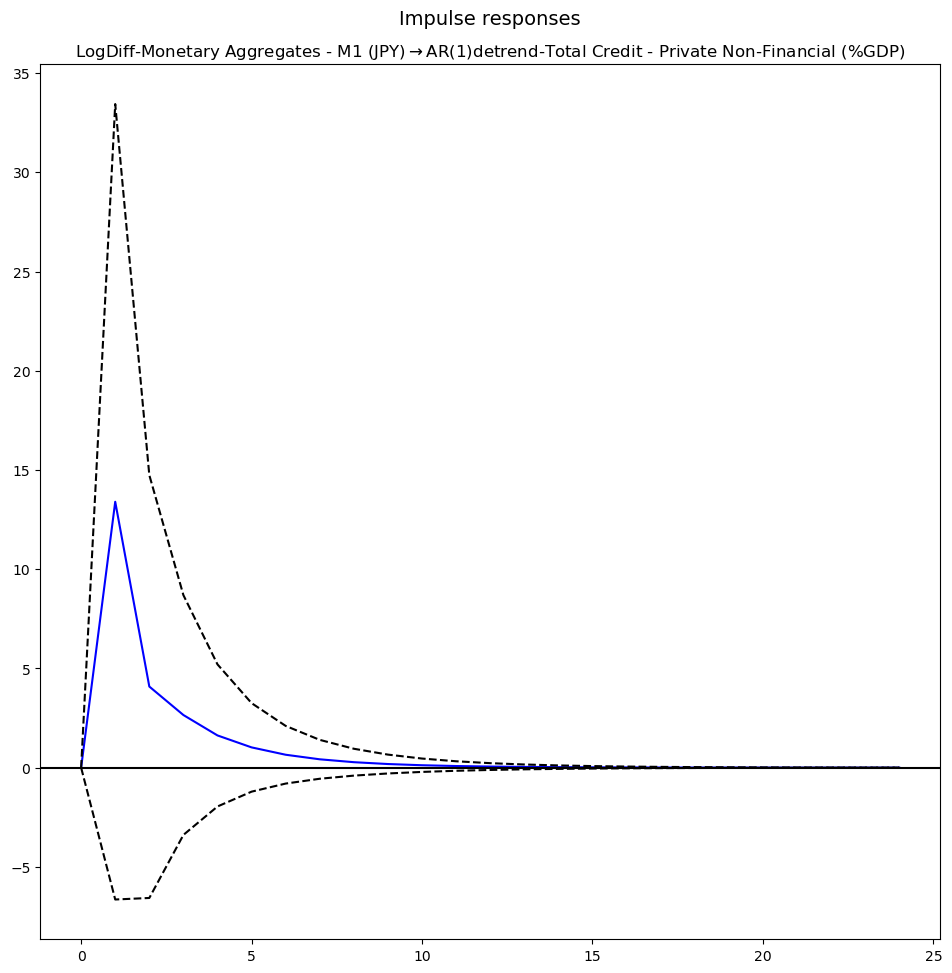

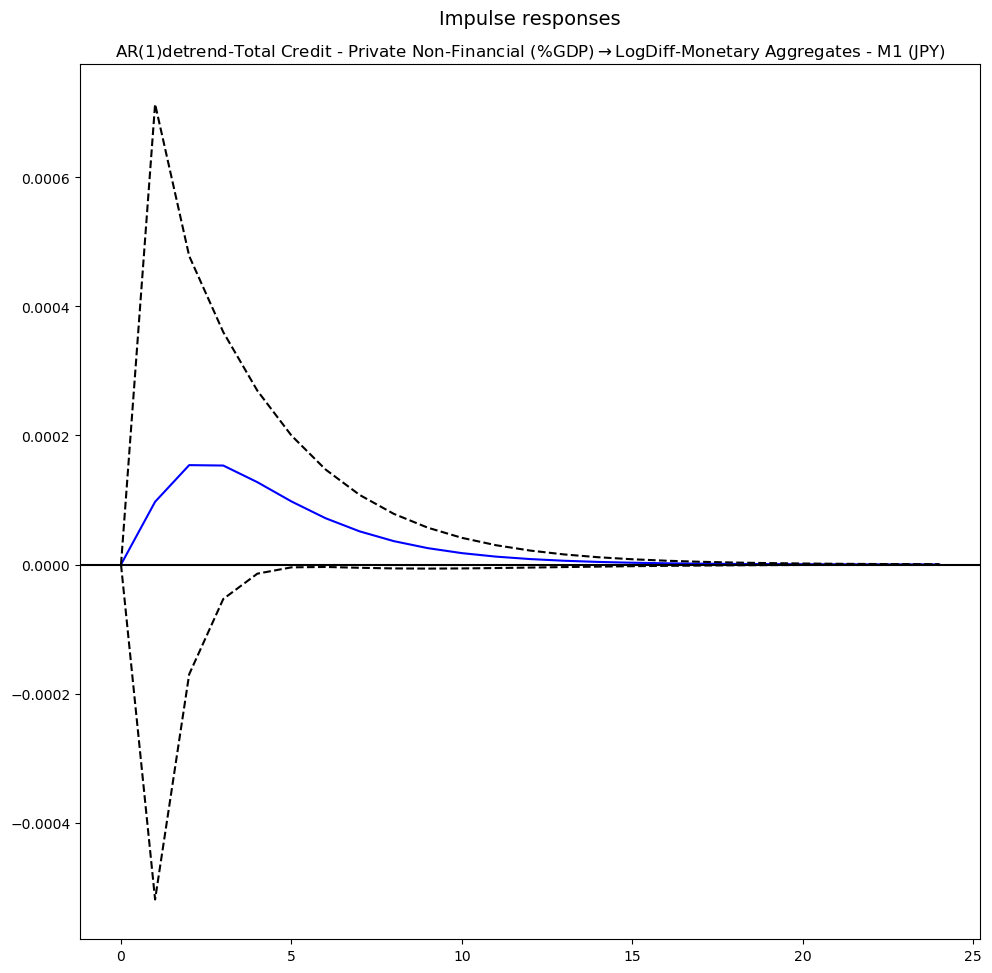

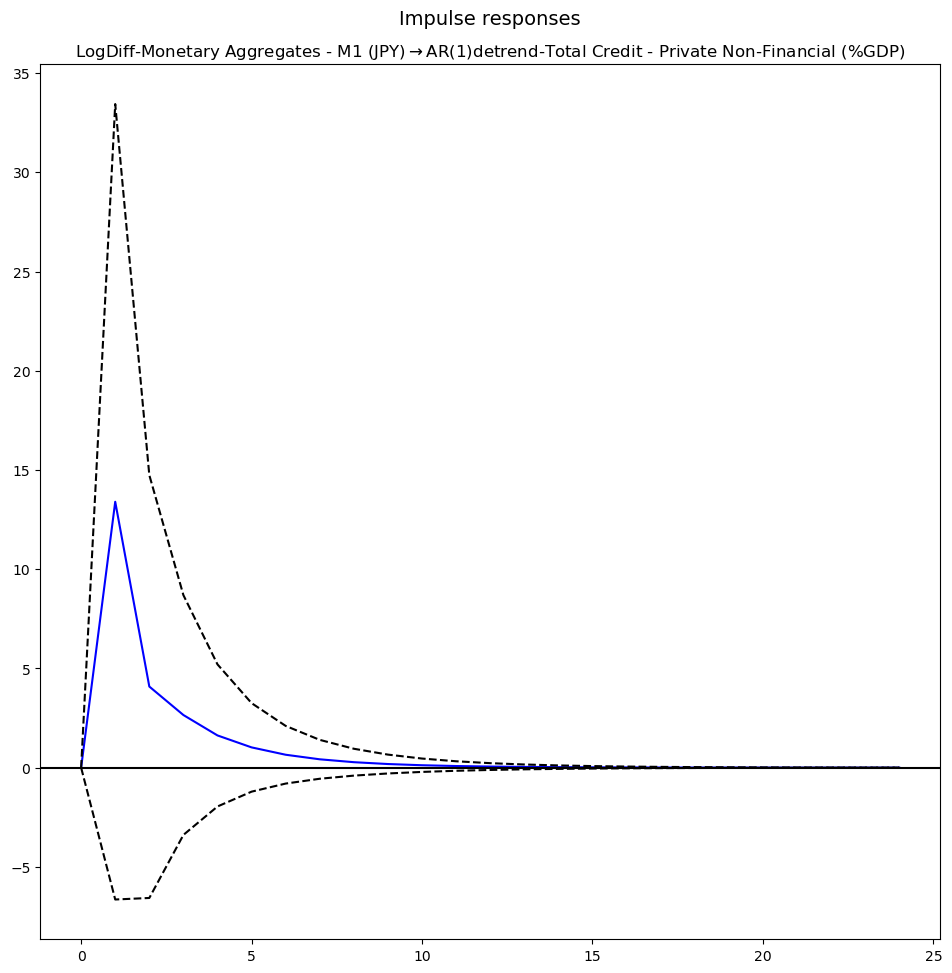

In [34]:
irf = var_res.irf(24)  # 24 months horizon

# Credit shock -> Money response
irf.plot(impulse=credit, response=money)

# Money shock -> Credit response
irf.plot(impulse=money, response=credit)


In [35]:
money_m3 = "LogDiff-Monetary Aggregates - M3 (JPY)"
vars_all_m3 = [money_m3, credit] + controls

data_m3 = df[vars_all_m3].dropna()
model_m3 = VAR(data_m3)
p_m3 = model_m3.select_order(12).selected_orders["aic"]
res_m3 = model_m3.fit(p_m3)

print(res_m3.test_causality(caused=money_m3, causing=[credit], kind="wald").summary())
print(res_m3.test_causality(caused=credit, causing=[money_m3], kind="wald").summary())


d:\Conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Granger causality Wald-test. H_0: AR(1)detrend-Total Credit - Private Non-Financial (%GDP) does not Granger-cause LogDiff-Monetary Aggregates - M3 (JPY). Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         46.02          7.815   0.000  3
----------------------------------------
Granger causality Wald-test. H_0: LogDiff-Monetary Aggregates - M3 (JPY) does not Granger-cause AR(1)detrend-Total Credit - Private Non-Financial (%GDP). Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         2.241          7.815   0.524  3
----------------------------------------


Bottom line (important)

“No Granger causality” is the expected outcome of a fully endogenous monetary system under YCC.

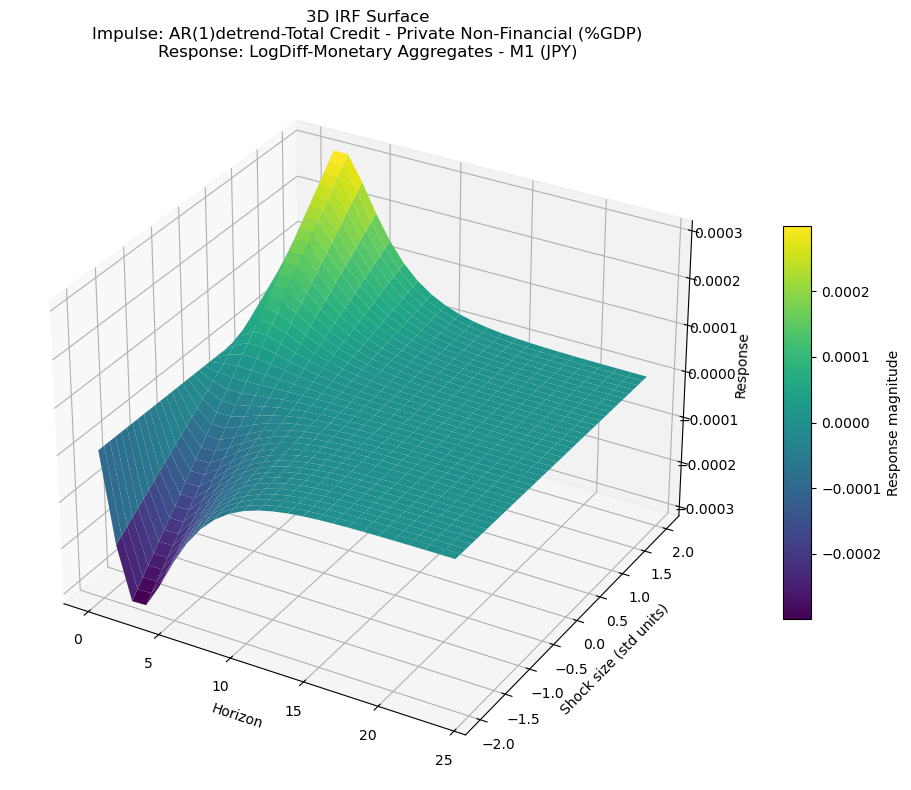

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ====== SETTINGS ======
HORIZON = 24
N_SHOCKS = 40
SHOCK_MIN, SHOCK_MAX = -2, 2
CMAP = "viridis"

IMPULSE_VAR  = "AR(1)detrend-Total Credit - Private Non-Financial (%GDP)"
RESPONSE_VAR = "LogDiff-Monetary Aggregates - M1 (JPY)"  # <-- M1 is in your model

# ====== IRF EXTRACTION ======
names = list(var_res.names)

if IMPULSE_VAR not in names:
    raise ValueError(f"Impulse '{IMPULSE_VAR}' not in var_res.names:\n{names}")
if RESPONSE_VAR not in names:
    raise ValueError(f"Response '{RESPONSE_VAR}' not in var_res.names:\n{names}")

impulse_idx = names.index(IMPULSE_VAR)
response_idx = names.index(RESPONSE_VAR)

irf = var_res.irf(HORIZON)
irf_vals = irf.irfs[:, response_idx, impulse_idx]  # [h, resp, imp]

# ====== SURFACE GRID ======
horizons = np.arange(HORIZON + 1)
shock_sizes = np.linspace(SHOCK_MIN, SHOCK_MAX, N_SHOCKS)

X, Y = np.meshgrid(horizons, shock_sizes)
Z = shock_sizes[:, None] * irf_vals[None, :]

# ====== 3D PLOT ======
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(X, Y, Z, cmap=CMAP, linewidth=0, antialiased=True)

ax.set_xlabel("Horizon")
ax.set_ylabel("Shock size (std units)")
ax.set_zlabel("Response")
ax.set_title(f"3D IRF Surface\nImpulse: {IMPULSE_VAR}\nResponse: {RESPONSE_VAR}")

cbar = fig.colorbar(surf, shrink=0.55, aspect=14)
cbar.set_label("Response magnitude")

plt.tight_layout()
plt.show()


C:\Users\eland\AppData\Local\Temp\ipykernel_22536\841086945.py:120: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)
C:\Users\eland\AppData\Local\Temp\ipykernel_22536\841086945.py:120: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)
C:\Users\eland\AppData\Local\Temp\ipykernel_22536\841086945.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\eland\AppData\Local\Temp\ipykernel_22536\841086945.py:180: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to

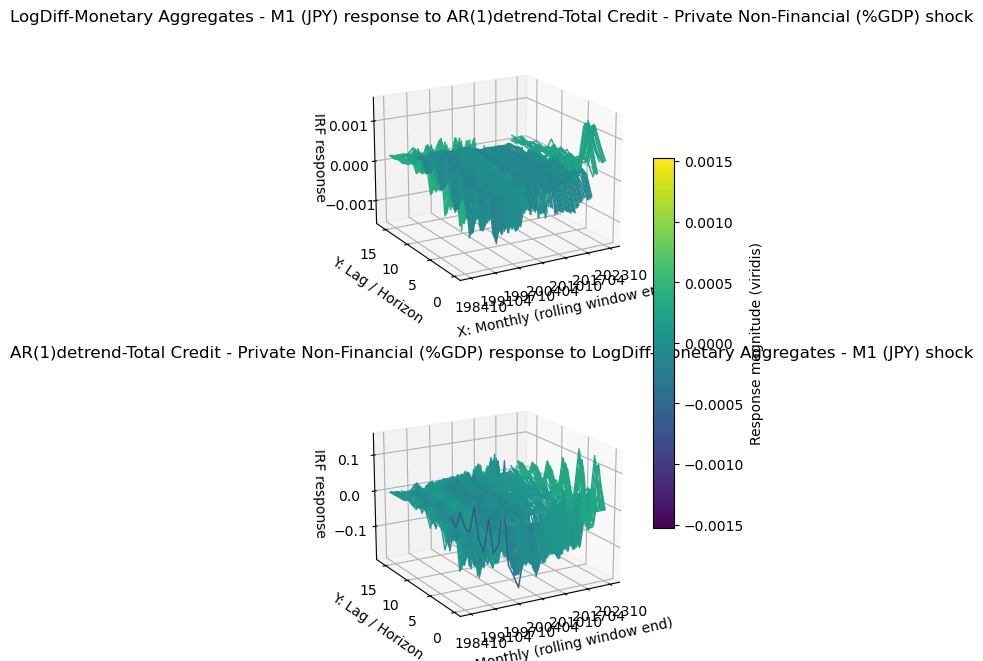

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from statsmodels.tsa.api import VAR

# =========================
# 1) Load your transformed data
# =========================

df = jp_trans_df.copy()

# Expect 'Time' like "1950-12"
df["Time"] = pd.to_datetime(df["Time"], format="%Y-%m")
df = df.sort_values("Time").set_index("Time")

# =========================
# 2) Choose VAR variables (must be IN df.columns)
#    Include impulse/response vars + controls if you want
# =========================
# Example names (adjust to what you actually used in var_res.names / df.columns)
CREDIT = "AR(1)detrend-Total Credit - Private Non-Financial (%GDP)"
MONEY  = "LogDiff-Monetary Aggregates - M1 (JPY)"  # your fitted system had M1

CONTROLS = [
    # uncomment if present / desired
    # "LogDiff-HICP (NSA)",
    # "HPfilter-Real GDP (billions chained 2015 JPY)",
    # "AR(1)detrend-Call Money/Interbank Immediate (%)",
    # "AR(1)detrend-10-Year Gov Bond Yields (%)",
    # "LogDiff-JPY-USD Spot Exchange Rate",
    # "LogDiff-BoJ’s Total Assets (100 Million Yen)",
    # "LogDiff-Total Treasury Reserves (- Gold)",
]

VAR_COLS = [CREDIT, MONEY] + CONTROLS

missing = [c for c in VAR_COLS if c not in df.columns]
if missing:
    raise ValueError("Missing columns in df:\n" + "\n".join(missing))

data = df[VAR_COLS].dropna()

# =========================
# 3) Rolling VAR + IRF settings
# =========================
WINDOW = 240   # 240 months = 20 years (change as you like)
P_LAGS = 6     # VAR lag order (keep fixed for comparability)
H = 16         # IRF horizon / lag axis like your example

# If you want orthogonalized IRFs (Cholesky), use orth=True below
ORTH = True

# =========================
# 4) Compute rolling IRFs: store a matrix [time, horizon]
# =========================
def rolling_irf_matrix(data, impulse_var, response_var, window, p_lags, horizon, orth=True):
    """
    Returns:
      dates_end: array of window end dates
      Z: matrix shape (n_windows, horizon+1) with IRF(response <- impulse)
    """
    names = list(data.columns)
    if impulse_var not in names or response_var not in names:
        raise ValueError("Impulse/response not found in data columns.")

    imp_idx = names.index(impulse_var)
    resp_idx = names.index(response_var)

    Z_list = []
    dates_end = []

    values = data.values

    for end in range(window, len(data) + 1):
        sample = values[end - window:end, :]
        sample_df = pd.DataFrame(sample, columns=names)

        try:
            res = VAR(sample_df).fit(p_lags)
            irf = res.irf(horizon)

            if orth:
                # orth_irfs: [horizon+1, n_vars, n_vars]
                z = irf.orth_irfs[:, resp_idx, imp_idx]
            else:
                z = irf.irfs[:, resp_idx, imp_idx]

            Z_list.append(z)
            dates_end.append(data.index[end - 1])

        except Exception:
            # If a window fails (rare), append NaNs to keep alignment
            Z_list.append(np.full(horizon + 1, np.nan))
            dates_end.append(data.index[end - 1])

    Z = np.vstack(Z_list)  # (n_windows, horizon+1)
    dates_end = np.array(dates_end)
    return dates_end, Z

# Example 2 panels:
#  - Panel 1: Money response to Credit shock  (endogenous money lens)
#  - Panel 2: Credit response to Money shock  (reverse direction)
dates1, Z1 = rolling_irf_matrix(data, impulse_var=CREDIT, response_var=MONEY,
                                window=WINDOW, p_lags=P_LAGS, horizon=H, orth=ORTH)

dates2, Z2 = rolling_irf_matrix(data, impulse_var=MONEY, response_var=CREDIT,
                                window=WINDOW, p_lags=P_LAGS, horizon=H, orth=ORTH)

# =========================
# 5) Plot: 3D “waterfall/ridge” style like your example
# =========================
def plot_3d_waterfall(ax, dates_end, Z, title, cmap_name="viridis",
                      stride=3, elev=18, azim=-120):
    """
    Waterfall: many 3D lines (one per time) across horizon.
    stride controls how many time-slices you plot to reduce clutter (e.g., 3 => every 3rd window).
    """
    cmap = cm.get_cmap(cmap_name)

    # X axis: time index (use integer positions for speed, label with dates)
    x = np.arange(len(dates_end))
    y = np.arange(Z.shape[1])  # horizons 0..H

    ax.view_init(elev=elev, azim=azim)

    # Normalize colors by response magnitude for nicer shading
    z_min = np.nanmin(Z)
    z_max = np.nanmax(Z)
    denom = (z_max - z_min) if (z_max > z_min) else 1.0

    for i in range(0, len(x), stride):
        zi = Z[i, :]
        if np.all(np.isnan(zi)):
            continue
        # Color each ridge by its average height (you can change this)
        cval = np.nanmean(zi)
        c = cmap((cval - z_min) / denom)
        ax.plot(np.full_like(y, x[i]), y, zi, color=c, linewidth=1.0)

    ax.set_title(title, pad=10)
    ax.set_xlabel("X: Monthly (rolling window end)")
    ax.set_ylabel("Y: Lag / Horizon")
    ax.set_zlabel("IRF response")

    # Make X tick labels show dates (sparser ticks)
    tick_step = max(1, len(x) // 6)
    xticks = np.arange(0, len(x), tick_step)
    ax.set_xticks(xticks)
    ax.set_xticklabels([dates_end[t].strftime("%Y%m") for t in xticks], rotation=0)

    # Add a colorbar “proxy” (since lines don’t carry a mappable automatically)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([z_min, z_max])
    return mappable

fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(2, 1, 1, projection="3d")
m1 = plot_3d_waterfall(
    ax1, dates1, Z1,
    title=f"{MONEY} response to {CREDIT} shock",
    cmap_name="viridis",
    stride=3
)

ax2 = fig.add_subplot(2, 1, 2, projection="3d")
m2 = plot_3d_waterfall(
    ax2, dates2, Z2,
    title=f"{CREDIT} response to {MONEY} shock",
    cmap_name="viridis",
    stride=3
)

# One shared colorbar (use the first)
cbar = fig.colorbar(m1, ax=[ax1, ax2], shrink=0.6, aspect=18, pad=0.02)
cbar.set_label("Response magnitude (viridis)")

plt.tight_layout()
plt.show()


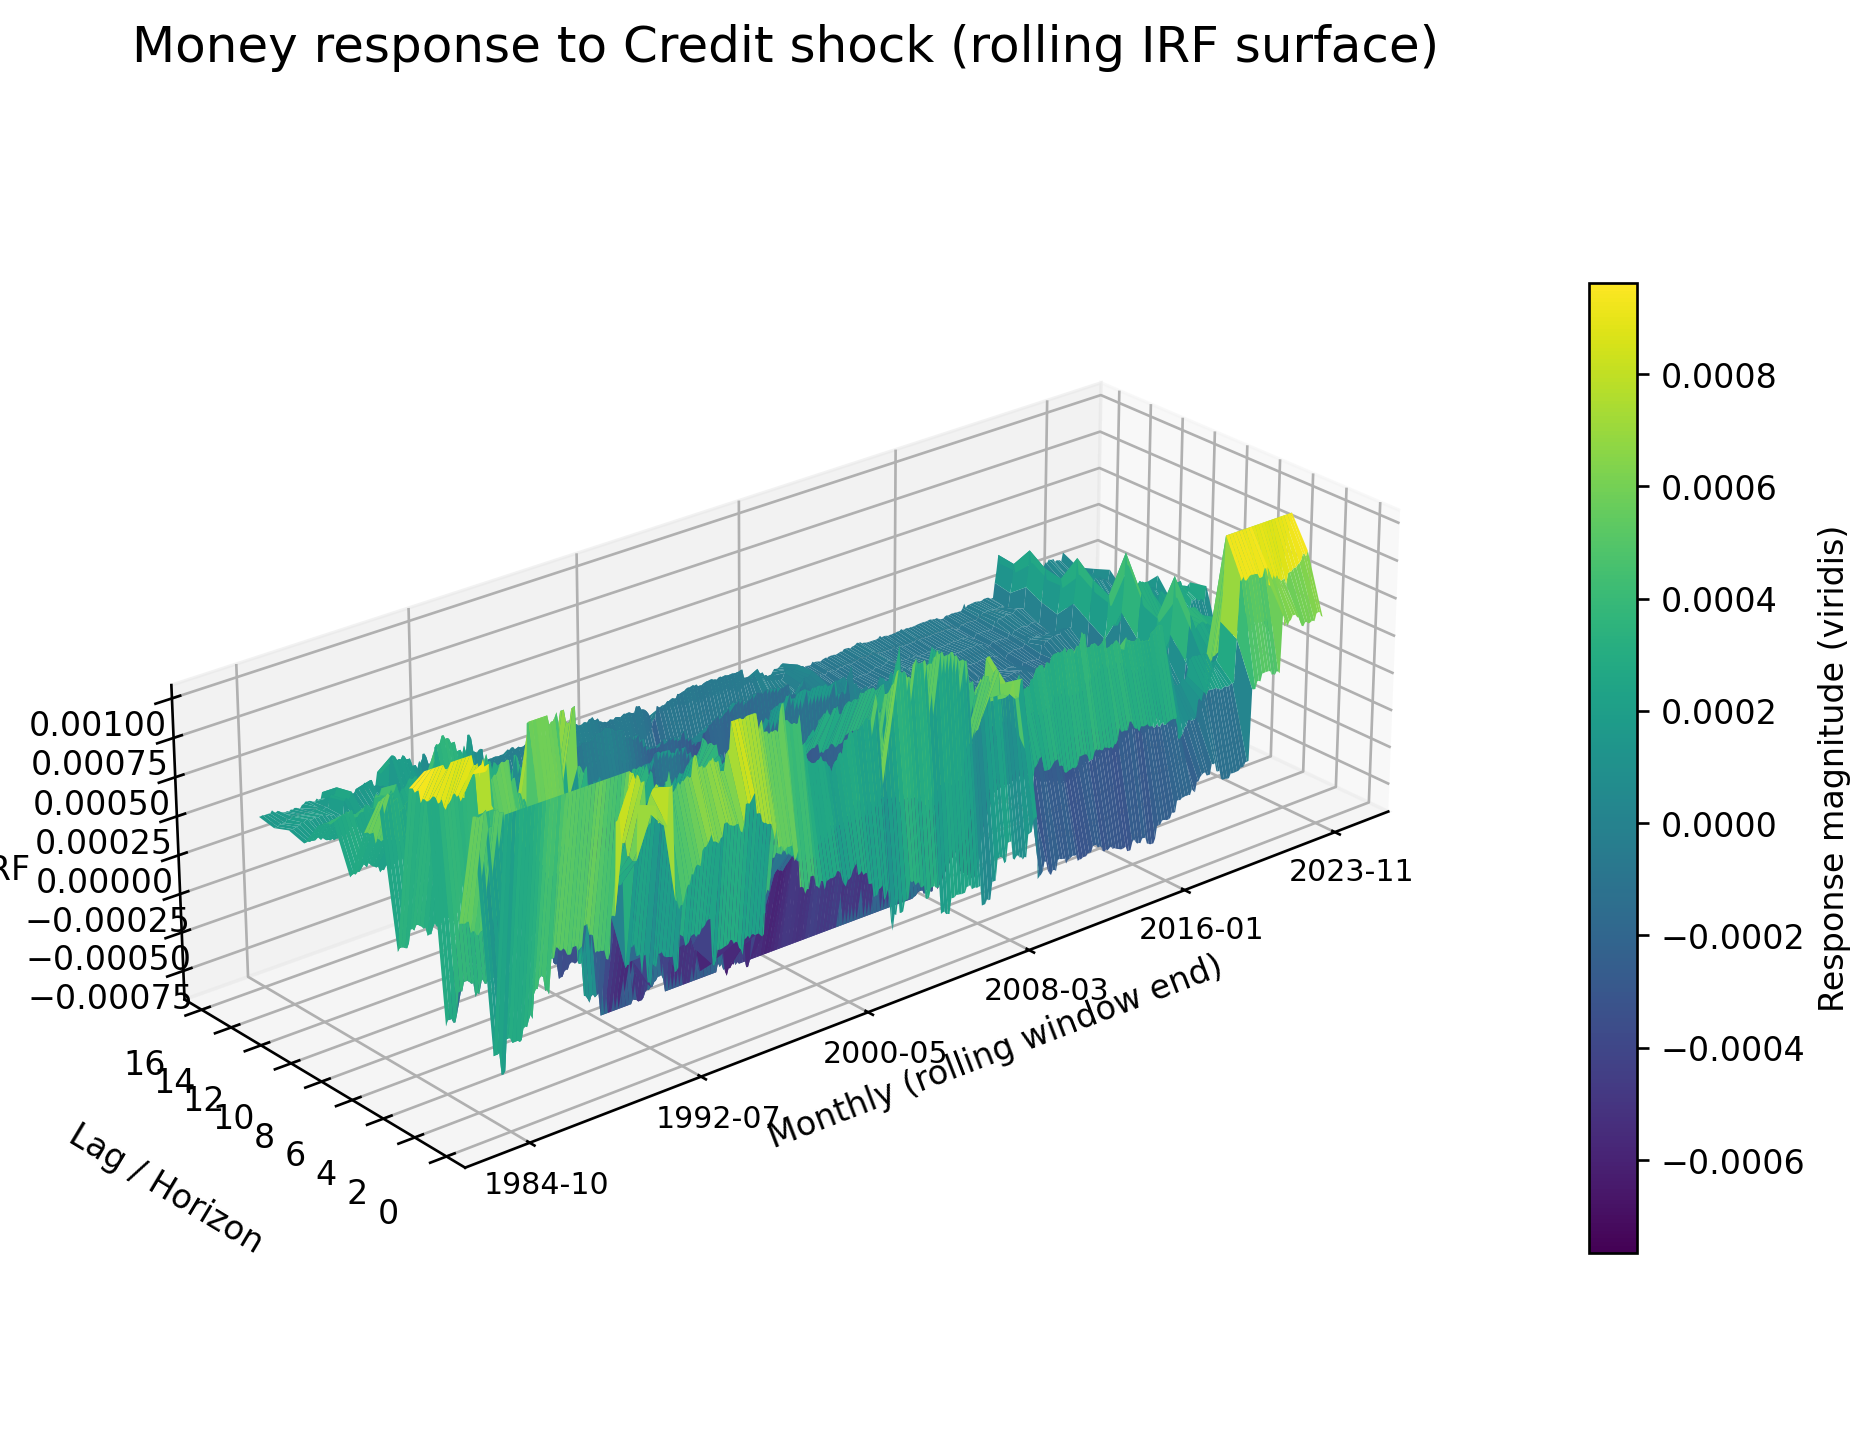

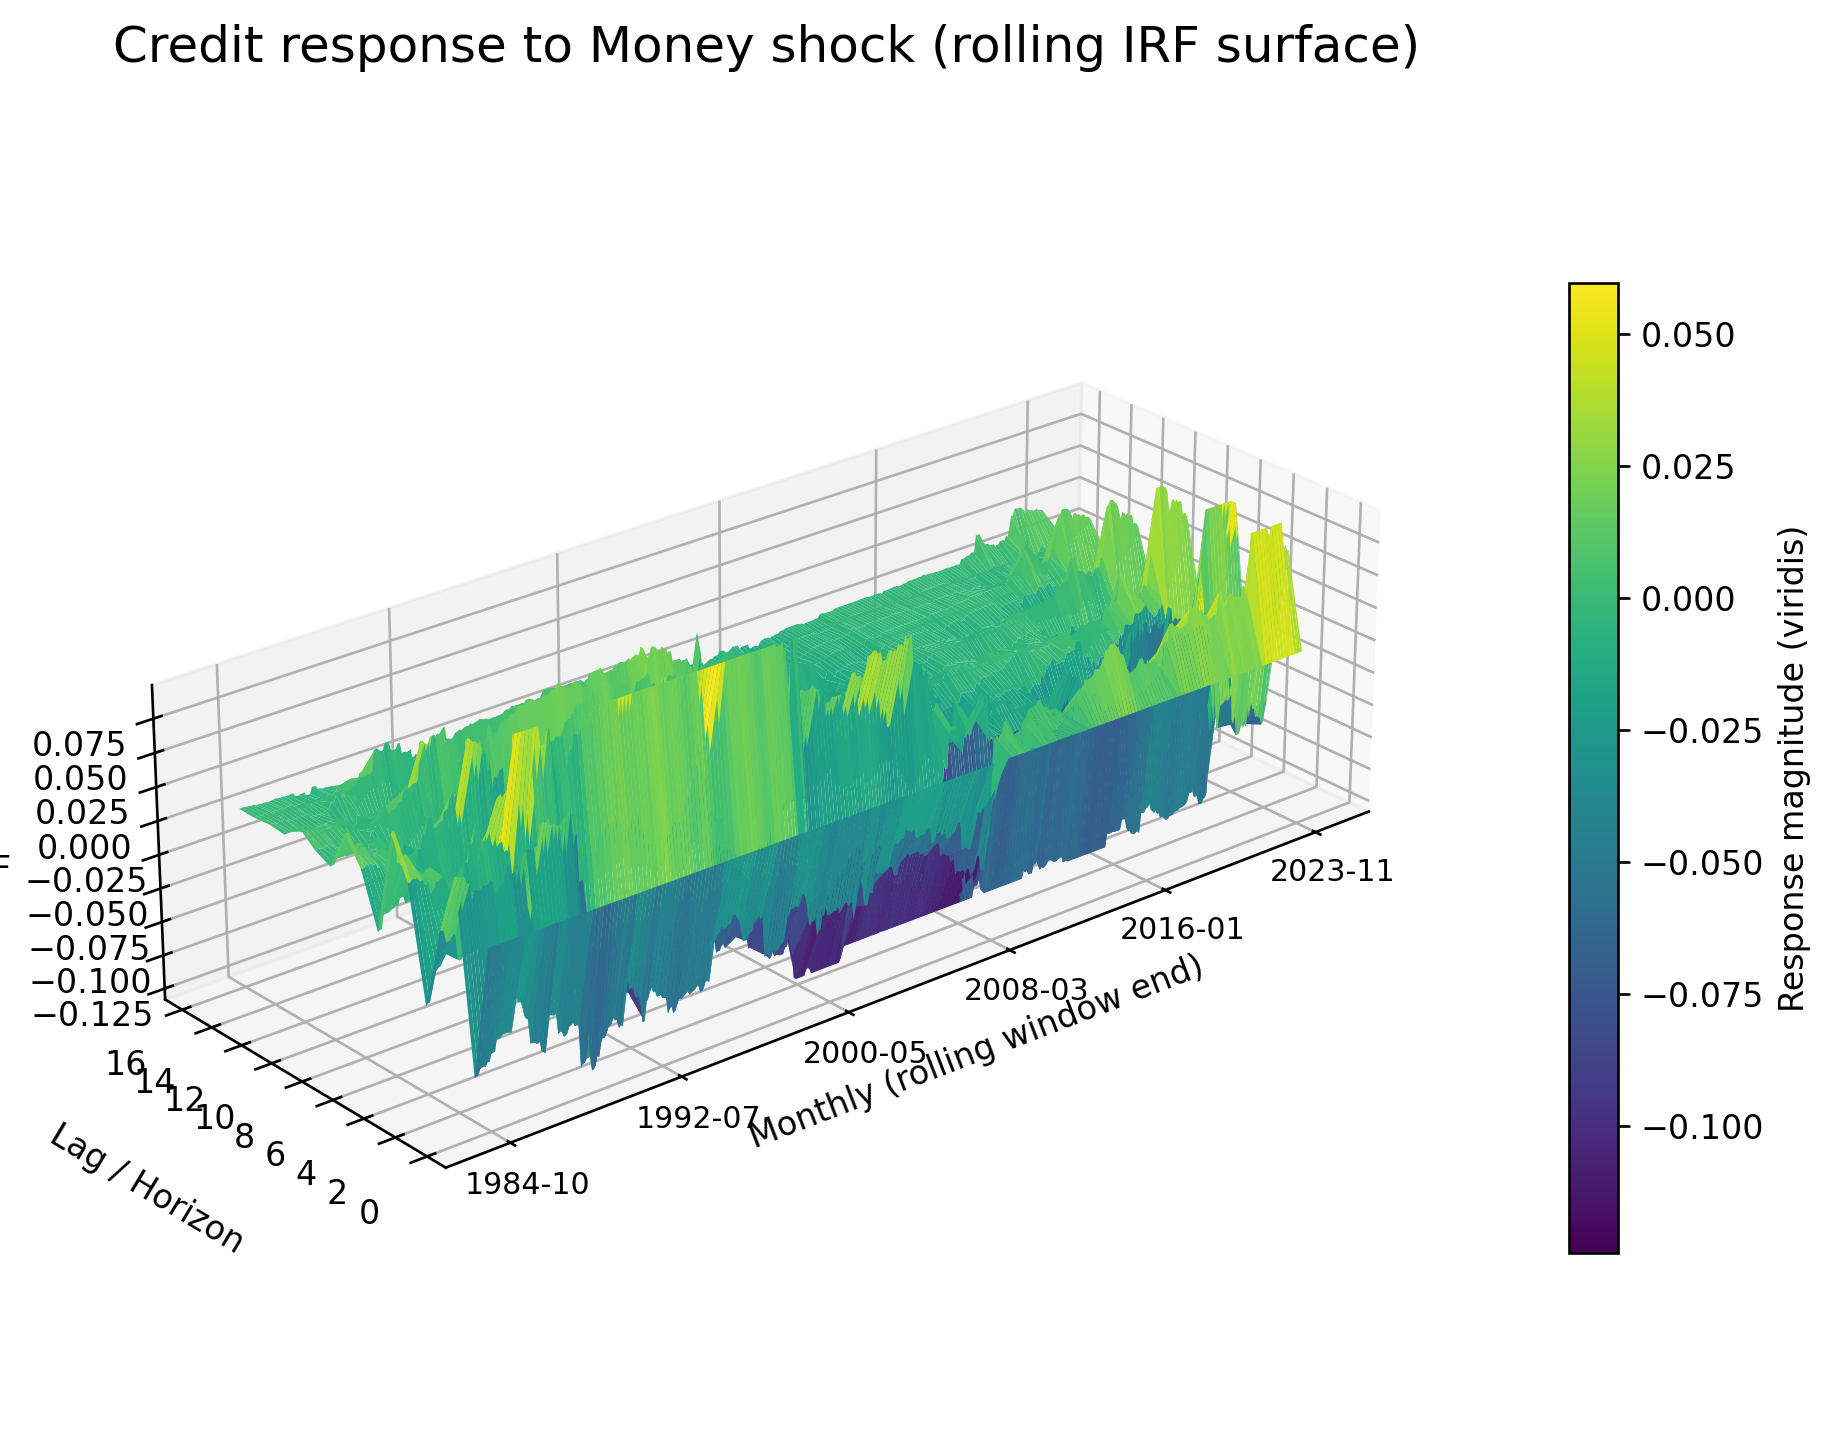

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401


def plot_irf_surface_single(
    dates_end, Z,
    title,
    cmap="viridis",
    elev=25, azim=-130,
    x_tick_count=6,
    y_tick_step=2,
    clip_q=(0.02, 0.98),
    scale=1.0,
    figsize=(14, 7),
    dpi=220,
    outpath=None
):
    """
    dates_end: array-like of datetimes, length T
    Z: array shape (T, H+1)  (rolling windows by horizons)
    scale: multiply Z by this factor for readability (visual only)
    outpath: if provided, saves PNG
    """
    Z = np.asarray(Z, float)
    T, H1 = Z.shape

    # Build grid for plot_surface: we want (H+1, T)
    x = np.arange(T)
    y = np.arange(H1)
    X, Y = np.meshgrid(x, y, indexing="xy")   # (H+1, T)

    Zs = (Z.T) * scale                        # (H+1, T)

    # Clip outliers so colormap isn't dominated by spikes
    lo, hi = np.nanquantile(Zs, clip_q)
    Zc = np.clip(Zs, lo, hi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, projection="3d")

    surf = ax.plot_surface(
        X, Y, Zc,
        cmap=cmap,
        rstride=1, cstride=2,      # cstride=2 reduces mesh density along time
        linewidth=0,
        antialiased=True,
        shade=True
    )

    # Camera + aspect (this matters a lot)
    ax.view_init(elev=elev, azim=azim)
    ax.set_box_aspect((3.2, 1.2, 0.9))  # (x, y, z) relative scales

    # Labels (shorter = cleaner)
    ax.set_title(title, pad=18, fontsize=15)
    ax.set_xlabel("Monthly (rolling window end)", labelpad=10)
    ax.set_ylabel("Lag / Horizon", labelpad=10)
    ax.set_zlabel("IRF", labelpad=6)

    # X ticks: sparse + readable
    tick_idx = np.linspace(0, T - 1, x_tick_count, dtype=int)
    ax.set_xticks(tick_idx)
    ax.set_xticklabels([dates_end[i].strftime("%Y-%m") for i in tick_idx], fontsize=9)

    # Y ticks every y_tick_step
    yticks = np.arange(0, H1, y_tick_step)
    ax.set_yticks(yticks)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    # Grid style
    ax.grid(True, alpha=0.25)

    # Colorbar (own per figure → no scale fights)
    cbar = fig.colorbar(surf, ax=ax, shrink=0.75, pad=0.06)
    cbar.set_label("Response magnitude (viridis)", rotation=90)

    # Optional save
    if outpath:
        plt.savefig(outpath, bbox_inches="tight")
    plt.show()


# -----------------------------
# USAGE: one plot per direction
# -----------------------------

# 1) Money response to Credit shock
# If it looks too flat, increase scale to e.g. 10 or 100 (visual only)
plot_irf_surface_single(
    dates_end=dates1,
    Z=Z1,
    title="Money response to Credit shock (rolling IRF surface)",
    cmap="viridis",
    elev=25, azim=-130,
    x_tick_count=6,
    y_tick_step=2,
    clip_q=(0.02, 0.98),
    scale=1.0,                        # try 10.0 if too flat
    figsize=(14, 7),
    dpi=240,
    outpath=None
)

# 2) Credit response to Money shock
plot_irf_surface_single(
    dates_end=dates2,
    Z=Z2,
    title="Credit response to Money shock (rolling IRF surface)",
    cmap="viridis",
    elev=25, azim=-130,
    x_tick_count=6,
    y_tick_step=2,
    clip_q=(0.02, 0.98),
    scale=1.0,                        # maybe 1.0 is fine here
    figsize=(14, 7),
    dpi=240,
    outpath=None
)


In [48]:
import numpy as np
import plotly.graph_objects as go

def plot_irf_surface_interactive(
    dates_end,
    Z,
    title,
    scale=1.0,
    clip_q=(0.02, 0.98),
    x_tick_count=7,
):
    """
    Interactive 3D IRF surface using Plotly (viridis).
    
    dates_end: list of datetime, length T
    Z: array (T, H+1)
    """

    Z = np.asarray(Z, float) * scale
    T, H1 = Z.shape

    # Axes
    x = np.arange(T)
    y = np.arange(H1)

    # Clip outliers (visual only)
    lo, hi = np.nanquantile(Z, clip_q)
    Zc = np.clip(Z, lo, hi)

    # X tick labels (sparse, readable)
    tick_idx = np.linspace(0, T - 1, x_tick_count, dtype=int)
    tick_text = [dates_end[i].strftime("%Y-%m") for i in tick_idx]

    fig = go.Figure(
        data=[
            go.Surface(
                x=x,
                y=y,
                z=Zc.T,               # (H+1, T)
                colorscale="Viridis",
                colorbar=dict(
                    title="IRF magnitude",
                    titleside="right"
                ),
                showscale=True,
            )
        ]
    )

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis=dict(
                title="Monthly (rolling window end)",
                tickmode="array",
                tickvals=tick_idx,
                ticktext=tick_text,
            ),
            yaxis=dict(
                title="Lag / Horizon",
                dtick=2,
            ),
            zaxis=dict(
                title="Response",
                zeroline=True,
            ),
            camera=dict(
                eye=dict(x=1.7, y=1.3, z=0.6)  # MATLAB-like view
            ),
            aspectratio=dict(x=3.2, y=1.2, z=0.9),
        ),
        margin=dict(l=0, r=0, b=0, t=60),
    )

    fig.show()


In [52]:
import numpy as np
import plotly.graph_objects as go

def plot_irf_surface_interactive(
    dates_end,
    Z,
    title,
    scale=1.0,
    clip_q=(0.02, 0.98),
    x_tick_count=7,
    y_max=None,         # <- NEW: max horizon to display (inclusive)
    y_tick_step=4,      # <- NEW: tick spacing on y
):
    Z = np.asarray(Z, float) * scale
    T, H1 = Z.shape  # H1 = H+1

    # choose how many horizons to show
    if y_max is None:
        y_max = H1 - 1
    y_max = int(min(y_max, H1 - 1))

    # slice to requested horizons: 0..y_max
    Z = Z[:, :y_max + 1]
    H1_show = y_max + 1

    x = np.arange(T)
    y = np.arange(H1_show)

    # clip for visuals
    lo, hi = np.nanquantile(Z, clip_q)
    Zc = np.clip(Z, lo, hi)

    # X ticks
    tick_idx = np.linspace(0, T - 1, x_tick_count, dtype=int)
    tick_text = [dates_end[i].strftime("%Y-%m") for i in tick_idx]

    fig = go.Figure(
        data=[
            go.Surface(
                x=x,
                y=y,
                z=Zc.T,  # (H1_show, T)
                colorscale="Viridis",
                showscale=True,
                colorbar=dict(title="IRF magnitude"),
            )
        ]
    )

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis=dict(
                title="Monthly (rolling window end)",
                tickmode="array",
                tickvals=tick_idx,
                ticktext=tick_text,
            ),
            yaxis=dict(
                title="Lag / Horizon",
                range=[0, y_max],
                dtick=y_tick_step,
            ),
            zaxis=dict(title="Response", zeroline=True),
            camera=dict(eye=dict(x=1.7, y=1.3, z=0.6)),
            aspectratio=dict(x=3.2, y=1.4, z=0.9),
        ),
        margin=dict(l=0, r=0, b=0, t=60),
    )

    fig.show()


In [53]:
plot_irf_surface_interactive(
    dates_end=dates1,
    Z=Z1,
    title="Money response to Credit shock (rolling IRF surface)",
    scale=1.0
)

plot_irf_surface_interactive(
    dates_end=dates2,
    Z=Z2,
    title="Credit response to Money shock (rolling IRF surface)",
    scale=1.0
)


- we are running a var for each window (120 months)
- stationary only after 2010, when it fluctuates: the money–credit transmission changes materially over time.
- typical rebouncings of IRFs
- Credit shocks primarily affect money in the short to medium run; long-run neutrality broadly holds.
- Regime-like behavior

You can visually identify three regimes:

1. Early period (right side of plot)

Responses are mostly positive

Persistent across horizons

Interpretation:

Credit expansions are accommodated by money growth

Monetary system is endogenous / accommodative

2. Middle period (deep negative trough)

Sharp negative response at short horizons

Rapid reversion afterward

Interpretation:

Credit shocks trigger monetary tightening

Possibly crisis / balance-sheet stress regime

Money supply reacts defensively to credit expansion

This spike is not noise — it is:

Large

Horizon-specific

Time-localized

That screams structural break or regime switch.

3. Recent period (left side of plot)

Responses flatten

Lower amplitude

Less horizon differentiation

Interpretation:

Weaker credit–money pass-through

Financial frictions or policy dampening

Possible saturation of credit channel